In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/images.zip -d .


Streaming output truncated to the last 5000 lines.
  inflating: ./images/11285990613_2cce57db86_o.jpg  
  inflating: ./images/12097017014_c6b5a84107_o.jpg  
  inflating: ./images/11854270183_5968f9c755_o.jpg  
  inflating: ./images/12112045203_c76f772eb9_o.jpg  
  inflating: ./images/11865987785_8104dd362e_o.jpg  
  inflating: ./images/8194283079_fe7c8c9b2f_o.jpg  
  inflating: ./images/10695414114_ae099f08c1_o.jpg  
  inflating: ./images/9374573862_01a33abb49_o.jpg  
  inflating: ./images/11540986863_8bf3dd8f33_o.jpg  
  inflating: ./images/9509754012_cfa8420a6c_o.jpg  
  inflating: ./images/11510462346_01124fa29c_o.jpg  
  inflating: ./images/9117889660_aa48e7d6b1_o.jpg  
  inflating: ./images/9138905502_c0cdec775e_o.jpg  
  inflating: ./images/8530816537_66d6b9319c_o.jpg  
  inflating: ./images/11769723944_f72a89fa3c_o.jpg  
  inflating: ./images/9619562692_d03aa91eb9_o.jpg  
  inflating: ./images/9819658524_8744c512c4_o.jpg  
  inflating: ./images/11850332495_07795d6cdc_o.jpg  
  i

In [5]:
%pylab inline
import os
import random
import cv2
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from SRC.TransfImage import transfImag
#from SRC.transfImage1 import transfImag1
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import PIL
from PIL import Image
from keras.layers.normalization import BatchNormalization
from keras.applications.vgg16 import preprocess_input
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD,Adam, Adamax
from keras.layers import Input
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras import backend as K
import keras
import json

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


# Creation of a unique database

Citation
A. Gallagher, T. Chen, �Understanding Groups of Images of People,� IEEE Conference on Computer Vision and Pattern Recognition, 2009.

In [0]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/fold_0_data.txt",sep="\t")

for i in range(1,5):
    df1=pd.read_csv("/content/drive/My Drive/Colab Notebooks/fold_%s_data.txt" %i,sep="\t")
    df=pd.concat([df,df1])
for i in range(0,5):
    df1=pd.read_csv("/content/drive/My Drive/Colab Notebooks/fold_frontal_%s_data.txt" %i,sep="\t")
    df=pd.concat([df,df1])
        


# New column age_label

In [7]:
#age bins: “00–02”, “04–06”, “08–13”, “15–20”, “25–32”, “38–43”, “48–53” and “60-100”
df=df[~df['age'].isnull()]
import re
def cleanAge(x):
    try:
        if '(' in x:
            res=int(re.findall(r'[0-9]*',x)[1])
        else:
            res=int(re.findall(r'[0-9]*',x)[0])
        if (res>=0) and (res<4):
             return '(0–2)'
        elif (res>=4) and (res<=6):
             return '(4–6)'
        elif (res>=7) and (res<=14):
             return '(8–13)'
        elif (res>=15) and (res<=20):
             return '(15–20)'
        elif (res>=21) and (res<=32):
             return '(25–32)'
        elif (res>=33) and (res<=47):
             return '(33–47)'
        elif (res>=48) and (res<=53):
             return '(48–53)'
        elif (res>=54) and (res<=100):
             return '(60–100)'
    except:
        return None

df['age_label']=df['age'].apply(cleanAge)
    
df['age_label'].value_counts()
        

(25–32)     8894
(33–47)     4882
(0–2)       4346
(8–13)      3988
(4–6)       3726
(15–20)     2763
(60–100)    1644
(48–53)     1402
Name: age_label, dtype: int64

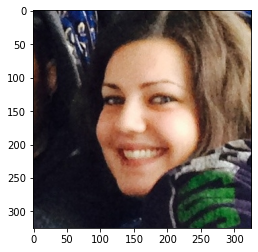

In [9]:
#check
PATH1='/content/images/11394449655_76f4bb4202_o.jpg'
im=cv2.imread(PATH1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

# Renaming of the pictures

In [0]:
'''#im=cv2.imread('INPUT/ageGenderDBCslab/faces/114841417@N06/coarse_tilt_aligned_face.2282.12068804204_085d553238_o.jpg')
PATH1='INPUT/ageGenderDBCslab/faces/'
for directory in os.listdir(PATH1):
    if directory!='.DS_Store':
        PATH2=PATH1+directory
        for image in os.listdir(PATH2):
            if '.jpg' in image:
                image1 = cv2.imread(PATH2+'/'+image)
                name=image.split('.')[2]
                name=name+'.jpg'
                print(name)
                PATH3='INPUT/ageGenderDBCslab/images/' + name
                
                cv2.imwrite(PATH3, image1, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
  '''

In [0]:
def writepath(image):
    path='/content/images/'+image
    return path
df['path']=df['original_image'].apply(writepath)
df.head()

In [4]:
df['age_label']=df['age_label'].astype(str)


NameError: ignored

In [10]:
df.shape

(32930, 14)

In [11]:
df.age_label.value_counts()

(25–32)     8894
(33–47)     4882
(0–2)       4346
(8–13)      3988
(4–6)       3726
(15–20)     2763
(60–100)    1644
(48–53)     1402
None        1285
Name: age_label, dtype: int64

# test and train dataset

In [0]:
import json
df=df.dropna()
df=df[df.age_label!='None']
X=df['path'].reset_index()
y=df['age_label'].reset_index()

label=LabelEncoder()
y=label.fit_transform(y['age_label'])
mapping = dict(zip(label.classes_, range(len(label.classes_))))
mapping1={}

for k,v in mapping.items():
    mapping1[v]=k

a_file = open("/content/drive/My Drive/Colab Notebooks/mapping.json", "w")
json.dump(mapping1, a_file,ensure_ascii=True)
a_file.close()



uniques, ids = np.unique(y, return_inverse=True)

from tensorflow.python.keras import utils
y = utils.np_utils.to_categorical(y, len(uniques))


In [13]:
pd.DataFrame(ids)[0].value_counts()

2    8799
3    4882
0    4346
7    3979
5    3726
1    2763
6    1633
4    1393
Name: 0, dtype: int64

In [0]:
mapping1[np.argmax([0,1,0,0,0])]

'(15–20)'

In [0]:
'''import codecs
import ast
from keras.models import model_from_json
with codecs.open('SRC/mapping.txt', 'r', 'utf-8') as f:
     output = ast.literal_eval(f.read())


print(output)
PATH1='INPUT/ageGenderDBCslab/images/12068804204_085d553238_o.jpg'
im=cv2.imread(PATH1)
im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

def predict_age(image):
    img_data=transfImag1(image)
    with open('Model_0.6785500645637512_16-12-46.h5.json','r') as f:
        model_json = json.load(f)
        model = model_from_json(model_json)
        model.load_weights('Model_0.6785500645637512_16-12-46.h5')
        #image = np.expand_dims(img_data,axis=0).reshape(np.expand_dims(img_data,axis=0).shape[0], 64, 64, 1)
        image = np.expand_dims(img_data,axis=0).reshape(1, 64, 64, 1)
        pred = model.predict(image)[0]
        print(pred)
        age=output[np.argmax(pred)]
        return age'''

predict_age(im_bw)

{0: '(0–2)', 1: '(15–20)', 2: '(25–32)', 3: '(33–47)', 4: '(48–53)', 5: '(4–6)', 6: '(60–100)', 7: '(8–13)'}
[0.00011905 0.00288317 0.01335058 0.06588393 0.0074185  0.07750896
 0.00970327]


'(4–6)'

# Images processing

In [0]:
face_cascade = cv2.CascadeClassifier('/Users/silviaserafini/ironhack/PROGETTI/youtube-people-detector/SRC/haarcascade_frontalface_default.xml')

train_images=[]
for image in X['path']:
    im = cv2.imread(image) 
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    try:
      faces = face_cascade.detectMultiScale(im_bw, 2, 4) 
      if len(faces) >1:
          faces=faces[0]
      x,y,w,h = faces
      cara = im_bw[y:y+h,x:x+h]
    except:
      cara=im_bw
    resized = cv2.resize(cara, (64,64))
    resized = resized.astype('float32')
    mean, sd = cv2.meanStdDev(resized)
    imageProc = (resized - mean) / sd
    train_images.append(imageProc)

train_x=np.stack(train_images)#provare a togliere la media e dividere per sd




In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_x, y, test_size=0.20)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25216, 64, 64) (6305, 64, 64) (25216, 8) (6305, 8)


In [0]:
img_rows, img_cols, img_channels = 64, 64, 1
num_classes=8

In [0]:
'''test_images=[]
for image in X_test['path']:
    im = cv2.imread(image) 
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(im_bw, (64,64),interpolation=cv2.INTER_AREA)
    resized=resized.astype('float32')
    test_images.append(resized)

test_x=np.stack(test_images)'''

"test_images=[]\nfor image in X_test['path']:\n    im = cv2.imread(image) \n    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)\n    resized = cv2.resize(im_bw, (64,64),interpolation=cv2.INTER_AREA)\n    resized=resized.astype('float32')\n    test_images.append(resized)\n\ntest_x=np.stack(test_images)"

In [0]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25216, 64, 64, 1) (6305, 64, 64, 1) (25216, 8) (6305, 8)


# Building the model

In [15]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(64,64,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20,verbose=1, batch_size=50)

Train on 25216 samples, validate on 6305 samples
Epoch 1/20
25216/25216 [==============================] - 11s 437us/step - loss: 2.0125 - accuracy: 0.2653 - val_loss: 1.7821 - val_accuracy: 0.3472
Epoch 2/20
25216/25216 [==============================] - 4s 151us/step - loss: 1.7641 - accuracy: 0.3567 - val_loss: 1.6555 - val_accuracy: 0.3799
Epoch 3/20
25216/25216 [==============================] - 4s 154us/step - loss: 1.6727 - accuracy: 0.3869 - val_loss: 1.5966 - val_accuracy: 0.3990
Epoch 4/20
25216/25216 [==============================] - 4s 156us/step - loss: 1.6197 - accuracy: 0.4072 - val_loss: 1.5702 - val_accuracy: 0.4217
Epoch 5/20
25216/25216 [==============================] - 4s 155us/step - loss: 1.5844 - accuracy: 0.4208 - val_loss: 1.5172 - val_accuracy: 0.4460
Epoch 6/20
25216/25216 [==============================] - 4s 150us/step - loss: 1.5441 - accuracy: 0.4381 - val_loss: 1.5193 - val_accuracy: 0.4381
Epoch 7/20
25216/25216 [==============================] - 4s 1

In [18]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape


((25216, 64, 64, 1), (6305, 64, 64, 1), (25216, 8), (6305, 8))

In [23]:
from keras.layers import Concatenate


img_height,img_width = 64,64 
num_classes = 8
img_input = Input(shape=(img_height,img_width,1))
img_conc = Concatenate()([img_input, img_input, img_input])     
base_model = applications.resnet50.ResNet50( include_top=False,input_tensor=img_conc)

#for layer in base_model.layers:
#  layer.trainable = False

x = base_model.output
x = Flatten(name='flatten')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)
model1 = Model(inputs=base_model.input, outputs=x)
model1.summary()

model1.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model1.fit(X_train, y_train, epochs = 25, batch_size = 64)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 8s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 64, 64, 3)    0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           concatenate_1[0][0]              
___________________________

In [33]:
moment=time.localtime()
name='Resnet_784_18-07-00.h5'
import json
model_json = model1.to_json()
with open('/content/drive/My Drive/Colab Notebooks/' + name +'.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5

model1.save_weights('/content/drive/My Drive/Colab Notebooks/' + name)
print("Saved model to disk")


Saved model to disk


In [19]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

epochsprof=25
lrate = 0.01
decay = lrate/epochsprof
adam = Adam(decay=decay)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochsprof, verbose=1, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)      

In [20]:
results = model.evaluate(X_test, y_test, batch_size=32)
print('test loss, test acc:', results)

6305/6305 [==============================] - 5s 795us/step
test loss, test acc: [0.9644071050335802, 0.7249801754951477]


In [0]:
import json
# serialize model to JSON
moment=time.localtime()
#name1='Model_{}_{}-{}-{}.h5'.format(model.history.history["val_accuracy"][-1],moment[2],moment[3],moment[4])
name1='Model_0.82_19-14-30.h5'
 
model_json = model.to_json()
with open('/content/drive/My Drive/Colab Notebooks/'+ name1 +'.json', "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights('/content/drive/My Drive/Colab Notebooks/'+ name1)

In [0]:
y_pred=model.predict(X_test)

for a in y_pred:
    i, = np.where(a == a.max())
    a[i]=1
    i, = np.where(a != a.max())
    a[i]=0

print(y_pred) 

df2=pd.DataFrame({
    "pred": label.inverse_transform(np.argmax(y_pred, axis=1)),
    "real": label.inverse_transform(np.argmax(y_test, axis=1))
})

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [0]:
df2

,pred,real
0,(33–47),(25–32)
1,(8–13),(8–13)
2,(25–32),(25–32)
3,(33–47),(33–47)
4,(33–47),(33–47)
...,...,...
6177,(0–2),(0–2)
6178,(0–2),(4–6)
6179,(25–32),(25–32)
6180,(8–13),(25–32)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


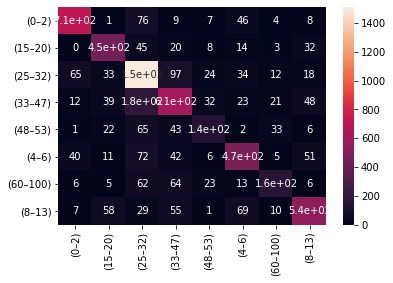

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(label.inverse_transform(np.argmax(y_test, axis=1)), label.inverse_transform(np.argmax(y_pred, axis=1)))#, normalize="true")
sns.heatmap(cm, annot=True,xticklabels=label.classes_, yticklabels=label.classes_)

In [0]:
df=df[df.gender!='None']
X=df['path'].reset_index()
y=df['gender'].reset_index()

y['gender']=np.where(y['gender']=='f', 1, 0)

mapping_gender = {1:'f',0:'m'} 


a_file = open("/content/drive/My Drive/Colab Notebooks/mapping_gender.json", "w")
json.dump(mapping_gender, a_file,ensure_ascii=True)
a_file.close()


from tensorflow.python.keras import utils
y = utils.np_utils.to_categorical(y['gender'], 2)


In [39]:
y.shape

(32930, 2)

In [0]:
train_images=[]
for image in X['path']:
    im = cv2.imread(image) 
    #plt.imshow(im)
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    #plt.imshow(im_bw)
    
    resized = cv2.resize(im_bw, (64,64))
    
    resized=resized.astype('float32')
    train_images.append(resized)

train_x=np.stack(train_images)


#normalizing pixels
train_x=train_x/255
X_train, X_test, y_train, y_test = train_test_split(train_x, y, test_size=0.20)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_x, y, test_size=0.20)


channel

In [0]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [43]:
num_classes=2
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape, padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

epochsprof=25
lrate = 0.01
decay = lrate/epochsprof
adam = Adam(decay=decay)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
print(model.summary())
history = model.fit(X_train, Y_train, epochs=epochsprof, verbose=1, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)      

In [55]:
results = model.evaluate(X_test, y_test, batch_size=32)
print('test loss, test acc:', results)

6586/6586 [==============================] - 8s 1ms/step
test loss, test acc: [0.4899245048054366, 0.7991193532943726]


In [0]:
moment=time.localtime()
name='GenderModel_{}_{}-{}-{}.h5'.format(model.history.history["val_accuracy"][-1],moment[2],moment[3],moment[4])
#model.save('/content/drive/My Drive/Colab Notebooks/'+ name)

In [53]:
name

'GenderModel_0.7991193532943726_18-10-46.h5'

In [0]:
import json
model_json = model.to_json()
with open('/content/drive/My Drive/Colab Notebooks/' + name +'.json', "w") as json_file:
    json_file.write(model_json)

model.save_weights('/content/drive/My Drive/Colab Notebooks/' + name)